## House Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [3]:
housing = pd.read_csv("data.csv")
print("First 5 rows of dataset:")
display(housing.head())

print("\nDataset Shape:", housing.shape)
print("\nColumns:", housing.columns.tolist())

First 5 rows of dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



Dataset Shape: (448, 14)

Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [4]:
print("\nDataset Info:")
print(housing.info())

print("\nStatistical Summary:")
display(housing.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     448 non-null    float64
 1   ZN       448 non-null    float64
 2   INDUS    448 non-null    float64
 3   CHAS     448 non-null    int64  
 4   NOX      448 non-null    float64
 5   RM       448 non-null    float64
 6   AGE      448 non-null    float64
 7   DIS      448 non-null    float64
 8   RAD      448 non-null    int64  
 9   TAX      448 non-null    int64  
 10  PTRATIO  448 non-null    float64
 11  B        448 non-null    float64
 12  LSTAT    448 non-null    float64
 13  MEDV     448 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 49.1 KB
None

Statistical Summary:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,1.336512,10.566964,11.818549,0.189732,0.612373,6.346283,71.854464,3.725023,8.444196,412.591518,17.823661,367.119844,11.993415,24.025670
std,1.496074,23.949237,7.165422,0.392527,0.165625,0.804016,29.943291,2.116428,8.162582,152.662692,2.569495,62.007634,6.561478,10.808965
min,0.006320,0.000000,0.740000,0.000000,0.400000,4.970000,4.400000,1.332500,1.000000,193.000000,12.600000,88.010000,1.980000,8.500000
25%,0.068447,0.000000,4.930000,0.000000,0.458000,5.871000,47.400000,1.802400,4.000000,306.500000,14.700000,374.560000,5.640000,16.600000
50%,0.770540,0.000000,10.010000,0.000000,0.547000,6.152000,82.900000,3.778700,5.000000,403.000000,18.400000,390.950000,12.430000,20.200000
75%,2.378570,0.000000,18.100000,0.000000,0.770000,6.631000,98.300000,5.400175,6.000000,432.000000,20.200000,396.900000,16.510000,29.900000
max,4.898220,90.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,29.930000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

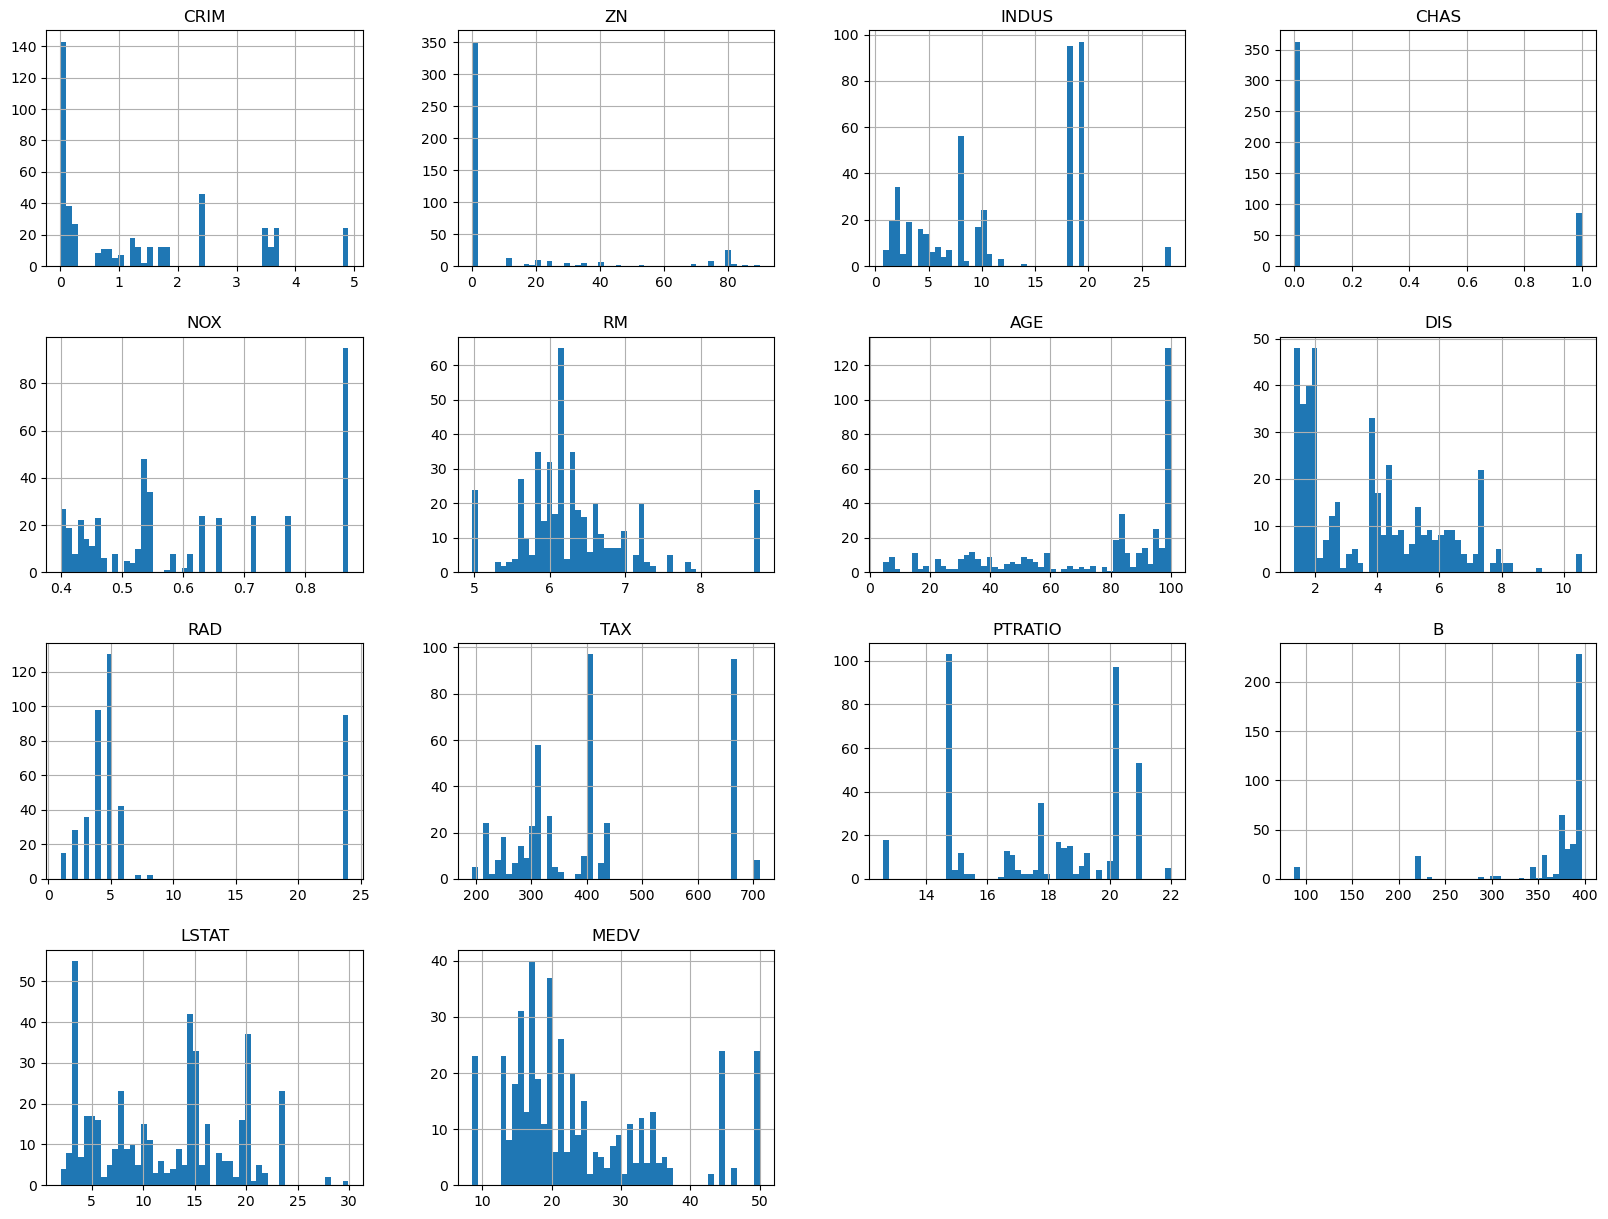

In [5]:
housing.hist(bins=50 , figsize=(20,15))

In [6]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.433408
RAD        0.324924
B          0.292264
ZN         0.267017
CRIM       0.200571
PTRATIO    0.184985
TAX        0.170871
DIS        0.149846
CHAS       0.042983
INDUS     -0.233116
AGE       -0.305359
NOX       -0.365848
LSTAT     -0.827504
Name: MEDV, dtype: float64

In [7]:
print("\nMissing Values:")
print(housing.isnull().sum())


Missing Values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


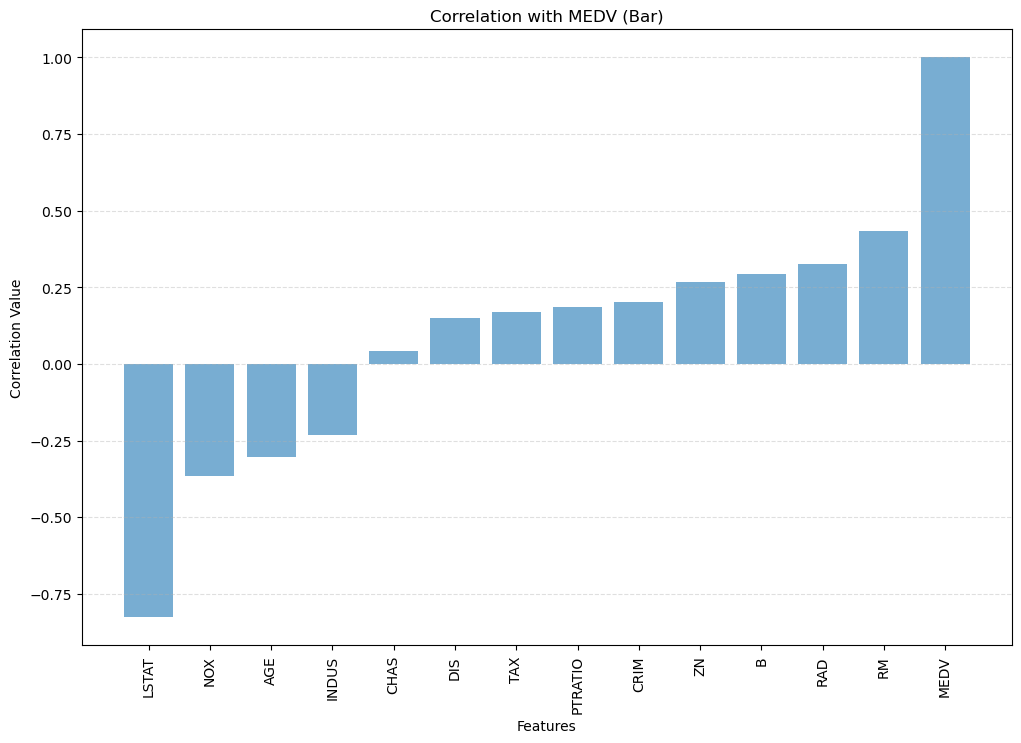

In [8]:
corr = housing.corr()["MEDV"].sort_values()
plt.figure(figsize=(12, 8))
plt.bar(corr.index, corr.values, alpha=0.6, label="Correlation (Bar)")
plt.xticks(rotation=90)
plt.title("Correlation with MEDV (Bar)")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [9]:
X = housing.drop("MEDV", axis=1)
y = housing["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)


Model Performance:
RMSE: 1.078626763270985
R2 Score: 0.9901371431614605


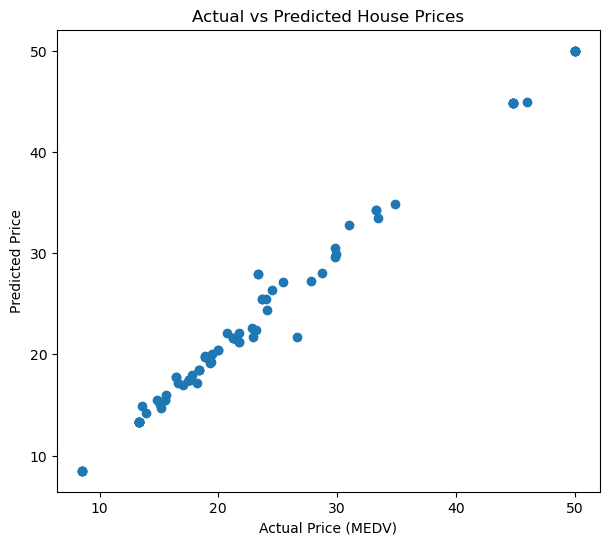

In [12]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("RMSE:", rmse)
print("R2 Score:", r2)

# Plot actual vs predicted
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price (MEDV)")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [13]:
sample = X.iloc[[0]] 
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print("\nPrediction for first row:", prediction[0])


Prediction for first row: 25.436999999999994


In [14]:
joblib.dump(model, "house_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\nModel and scaler saved successfully!")


Model and scaler saved successfully!
